In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [89]:
data = pd.read_csv("data.csv", index_col=0)
data = data.fillna(0)
data

,São Carlos,Ribeirão Preto,Bauru,Marília,Presidente Prudente,Assis,Jaú,Araraquara,Bataguassu,Campo Grande,Dourados,Maracaju,Piracicaba,Franca,Sorocaba
São Carlos,0.0,102.0,0.0,269.0,0.0,0.0,0.0,0.0,0.0,802.0,0.0,0.0,103.0,0.0,0.0
Ribeirão Preto,102.0,0.0,0.0,270.0,0.0,0.0,161.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0,0.0
Bauru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,397.0,0.0,0.0,734.0,0.0,0.0,0.0
Marília,269.0,270.0,0.0,0.0,0.0,0.0,0.0,233.0,0.0,0.0,626.0,0.0,0.0,358.0,0.0
Presidente Prudente,0.0,0.0,0.0,0.0,0.0,0.0,354.0,409.0,0.0,430.0,0.0,0.0,0.0,0.0,471.0
Assis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,553.0,0.0,0.0,374.0,0.0,0.0
Jaú,0.0,161.0,0.0,0.0,354.0,0.0,0.0,0.0,469.0,0.0,308.0,805.0,0.0,0.0,0.0
Araraquara,0.0,0.0,0.0,233.0,409.0,0.0,0.0,0.0,0.0,0.0,856.0,880.0,0.0,176.0,0.0
Bataguassu,0.0,0.0,397.0,0.0,0.0,0.0,469.0,0.0,0.0,0.0,0.0,0.0,610.0,0.0,588.0
Campo Grande,802.0,0.0,0.0,0.0,430.0,553.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0


In [84]:
node_names = {}
for i in range(len(initial_network)):
    node_names[i] = data.index.to_numpy()[i]

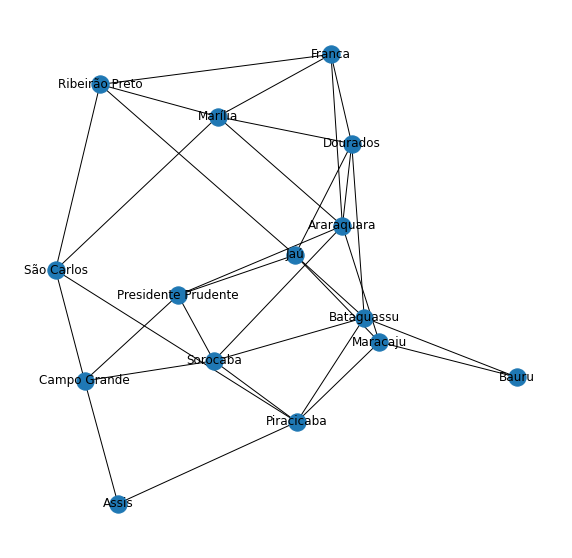

In [94]:
plt.figure(figsize=(10,10))
H = nx.from_numpy_array(data.to_numpy())
pos = nx.spring_layout(H)
nx.set_node_attributes(H, node_names, 'label')
nx.draw_networkx_labels(H, pos = pos, labels=node_names)
nx.draw(H,pos=pos)

In [76]:
from pyvis.network import Network

net = Network(notebook=False, width="800px", height="500px")
net.from_nx(H)
net.show("h.html")

Opening in existing browser session.


In [4]:
def dijkstra(G, src, tgt):
        
    n = len(G)
    dist = np.full(n, np.Inf)
    dist[src] = 0
    
    not_visited = np.arange(n)
    prev = np.full(n, None)
    current = src
    while not_visited.any():
        current = np.argmin([dist[i] for i in not_visited])
        not_visited = np.delete(not_visited, current)
        neig = [v for v in G[current] if v in not_visited]
        for u in neig:
            d = dist[current] + G[current][u]['weight']
            if d < dist[u]:
                dist[u] = d
                prev[u] = current
        if current == tgt:
            break
            
    path = [tgt]
    while not (prev[path[-1]] is None):
        path.append(prev[path[-1]])
    
    return path[::-1]

def minimum_edge(G, tgt, src):
    
    d = dijkstra(G, tgt, src)
    edges = []
    for i in zip(d,d[1:]):
        edges.append(G[i[0]][i[1]]['weight'])
    
    return (tgt, src, sum(edges))

In [58]:
np.random.seed(3) 

initial_network = nx.Graph()
idx = {np.array(H.nodes())[i]:i for i in range(len(H))}

n = len(H)
edge_list = []

for i,j in zip(np.random.choice(H.nodes, size=70), np.random.choice(H.nodes, size=70)):
    if i != j:
        edge_list.append(minimum_edge(H, idx[i], idx[j]))
        
for i in edge_list:
    initial_network.add_edge(i[0], i[1], weight=i[2])

nx.set_node_attributes(initial_network, node_names, 'label')

In [74]:
minimum_edge(H,10,2)

(10, 2, 0)

In [61]:
net = Network(notebook=False, width="800px", height="500px")
net.from_nx(T)
net.show("h.html")

Opening in existing browser session.
